<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_marketing/blob/main/proyecto1_aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar entorno drive


In [1]:
# prompt: mount drive y crear path para sys y para directorio de trabajo

from google.colab import drive
drive.mount('/content/drive')

import sys
import os

# Define the path to your working directory in Google Drive
path = "/content/drive/My Drive/cod/analitica_marketing"  # Replace with your actual directory


sys.path.append(path) ### para importar archivo de funciones propias a través de import

os.chdir(path) ### para que por defecto suba y descargue archivos partiendo de esa ruta

Mounted at /content/drive


# Cargar las librerias


In [ ]:
!pip install unidecode #(elimina caracteres especiales)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Eliminar Warnings
import warnings
warnings.filterwarnings("ignore")
# Importar librerias
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Instalacion del entorno GitHub

In [ ]:
# Instalar git en Colab
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Clonar el repositorio de GitHub
!git clone https://github.com/DanielMerkdo/ensayo.git

Cloning into 'ensayo'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 2.03 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
#Conectar base de datos con el entorno sql
conex=sql.connect("/content/ensayo/db_movies")
cur=conex.cursor() ###para funciones que ejecutan sql en base de datos

In [ ]:
cur= conex.cursor()

In [ ]:
# consultar el nombre de las tablas en la base de datos
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('ratings',), ('movies',)]

In [ ]:
# Así se ven en sql
cur.execute("SELECT * FROM movies")
cur.fetchall()

[(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy'),
 (2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'),
 (3, 'Grumpier Old Men (1995)', 'Comedy|Romance'),
 (4, 'Waiting to Exhale (1995)', 'Comedy|Drama|Romance'),
 (5, 'Father of the Bride Part II (1995)', 'Comedy'),
 (6, 'Heat (1995)', 'Action|Crime|Thriller'),
 (7, 'Sabrina (1995)', 'Comedy|Romance'),
 (8, 'Tom and Huck (1995)', 'Adventure|Children'),
 (9, 'Sudden Death (1995)', 'Action'),
 (10, 'GoldenEye (1995)', 'Action|Adventure|Thriller'),
 (11, 'American President, The (1995)', 'Comedy|Drama|Romance'),
 (12, 'Dracula: Dead and Loving It (1995)', 'Comedy|Horror'),
 (13, 'Balto (1995)', 'Adventure|Animation|Children'),
 (14, 'Nixon (1995)', 'Drama'),
 (15, 'Cutthroat Island (1995)', 'Action|Adventure|Romance'),
 (16, 'Casino (1995)', 'Crime|Drama'),
 (17, 'Sense and Sensibility (1995)', 'Drama|Romance'),
 (18, 'Four Rooms (1995)', 'Comedy'),
 (19, 'Ace Ventura: When Nature Calls (1995)', 'Comedy'),
 (20, 'Mo

In [ ]:
# Así se ven en sql
cur.execute("SELECT * FROM ratings")
cur.fetchall()

[(1, 1, 4.0, 964982703),
 (1, 3, 4.0, 964981247),
 (1, 6, 4.0, 964982224),
 (1, 47, 5.0, 964983815),
 (1, 50, 5.0, 964982931),
 (1, 70, 3.0, 964982400),
 (1, 101, 5.0, 964980868),
 (1, 110, 4.0, 964982176),
 (1, 151, 5.0, 964984041),
 (1, 157, 5.0, 964984100),
 (1, 163, 5.0, 964983650),
 (1, 216, 5.0, 964981208),
 (1, 223, 3.0, 964980985),
 (1, 231, 5.0, 964981179),
 (1, 235, 4.0, 964980908),
 (1, 260, 5.0, 964981680),
 (1, 296, 3.0, 964982967),
 (1, 316, 3.0, 964982310),
 (1, 333, 5.0, 964981179),
 (1, 349, 4.0, 964982563),
 (1, 356, 4.0, 964980962),
 (1, 362, 5.0, 964982588),
 (1, 367, 4.0, 964981710),
 (1, 423, 3.0, 964982363),
 (1, 441, 4.0, 964980868),
 (1, 457, 5.0, 964981909),
 (1, 480, 4.0, 964982346),
 (1, 500, 3.0, 964981208),
 (1, 527, 5.0, 964984002),
 (1, 543, 4.0, 964981179),
 (1, 552, 4.0, 964982653),
 (1, 553, 5.0, 964984153),
 (1, 590, 4.0, 964982546),
 (1, 592, 4.0, 964982271),
 (1, 593, 4.0, 964983793),
 (1, 596, 5.0, 964982838),
 (1, 608, 5.0, 964982931),
 (1, 648, 

In [ ]:
# Leer la base de datos en el entorno de Python
df_movies= pd.read_sql("SELECT * FROM movies", conex)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movies.shape

(9742, 3)

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# Leer la base de datos en el entorno de Python
df_ratings= pd.read_sql("SELECT * FROM ratings", conex)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_ratings.shape

(100836, 4)

In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Consultas con SqL

In [ ]:
### para verificar las tablas que hay disponibles
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('ratings',), ('movies',)]

In [ ]:
#Total de registros en la tabla ratings
pd.read_sql("select count(*) from ratings", conex)

,count(*)
0,100836


In [ ]:
#Total de registros en la tabla movies
pd.read_sql("select count(*) from movies", conex)

,count(*)
0,9742


In [ ]:
# Consultar el nombre de las columnas de la tabla "ratings"
column_names_query = "SELECT name FROM PRAGMA_TABLE_INFO('ratings')"
columns_ratings = pd.read_sql(column_names_query, conex)
columns_ratings

,name
0,userId
1,movieId
2,rating
3,timestamp


In [ ]:
# Consultar el nombre de las columnas de la tabla "movies"
column_names_query = "SELECT name FROM PRAGMA_TABLE_INFO('movies')"
columns_movies = pd.read_sql(column_names_query, conex)
columns_movies

,name
0,movieId
1,title
2,genres


In [ ]:
## Consultar los userld que aparecen más de una vez en la tabla ratings
query = """
SELECT
  userId,
  COUNT(*) AS cantidad
FROM ratings
GROUP BY userId
HAVING COUNT(*) > 1;
"""
df_user_counts = pd.read_sql(query, conex)
df_user_counts

,userId,cantidad
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [ ]:
# Consultar los movieId que aparecen más de una vez en la tabla movies
query = """
SELECT
  movieId,
  COUNT(*) AS cantidad
FROM movies
GROUP BY movieId
HAVING COUNT(*) > 1;
"""
df_movie_counts = pd.read_sql(query, conex)
df_movie_counts

,movieId,cantidad


In [ ]:
# Consultar registros duplicados en la tabla ratings
query = """
SELECT
    userId,
    movieId,
    rating,
    timestamp,
    COUNT(*) AS num_duplicates
FROM
    ratings
GROUP BY
    userId,
    movieId,
    rating,
    timestamp
HAVING
    COUNT(*) > 1;
"""
duplicate_records = pd.read_sql(query, conex)
duplicate_records

,userId,movieId,rating,timestamp,num_duplicates


In [ ]:
# Consultar registros duplicados en la tabla movies
query = """
SELECT
    movieId,
    title,
    COUNT(*) AS num_duplicates
FROM
    movies
GROUP BY
    movieId,
    title
HAVING
    COUNT(*) > 1;
"""

duplicate_records = pd.read_sql(query, conex)
duplicate_records

,movieId,title,num_duplicates


In [ ]:
# Consultar datos nulos en la tabla ratings
query = """
SELECT *
FROM ratings
WHERE userId IS NULL OR movieId IS NULL OR rating IS NULL OR timestamp IS NULL;
"""
null_records = pd.read_sql(query, conex)
null_records

,userId,movieId,rating,timestamp


In [ ]:
# Consultar datos nulos en la tabla movies
query = """
SELECT *
FROM movies
WHERE title IS NULL OR genres IS NULL;
"""
null_records = pd.read_sql(query, conex)
null_records

,movieId,title,genres


In [ ]:
# Géneros en la tabla movies
genres_movies = pd.read_sql("SELECT DISTINCT genres FROM movies", conex)
print(genres_movies)

                                          genres
0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
..                                           ...
946            Adventure|Mystery|Sci-Fi|Thriller
947                   Action|Comedy|Crime|Horror
948             Action|Adventure|Children|Sci-Fi
949       Action|Adventure|Comedy|Fantasy|Sci-Fi
950              Action|Animation|Comedy|Fantasy

[951 rows x 1 columns]


In [ ]:
# Géneros en la tabla ratings (unidos con movies)
genres_ratings = pd.read_sql("SELECT DISTINCT m.genres FROM ratings AS r JOIN movies AS m ON r.movieId = m.movieId", conex)
print(genres_ratings)

                                          genres
0    Adventure|Animation|Children|Comedy|Fantasy
1                                 Comedy|Romance
2                          Action|Crime|Thriller
3                               Mystery|Thriller
4                         Crime|Mystery|Thriller
..                                           ...
946                         Children|Crime|Drama
947                   Drama|Fantasy|Thriller|War
948                         Drama|Horror|Romance
949                        Horror|Romance|Sci-Fi
950                    Action|Crime|Drama|Sci-Fi

[951 rows x 1 columns]


In [ ]:
# Distribución de la columna 'rating'
query_rating = """
SELECT
    rating,
    COUNT(*) AS frequency
FROM
    ratings
GROUP BY
    rating
ORDER BY
    rating;
"""
df_rating_dist = pd.read_sql_query(query_rating, conex)
print("Distribución de Rating:\n", df_rating_dist)
conex.close()

Distribución de Rating:
    rating  frequency
0     0.5       1370
1     1.0       2811
2     1.5       1791
3     2.0       7551
4     2.5       5550
5     3.0      20047
6     3.5      13136
7     4.0      26818
8     4.5       8551
9     5.0      13211


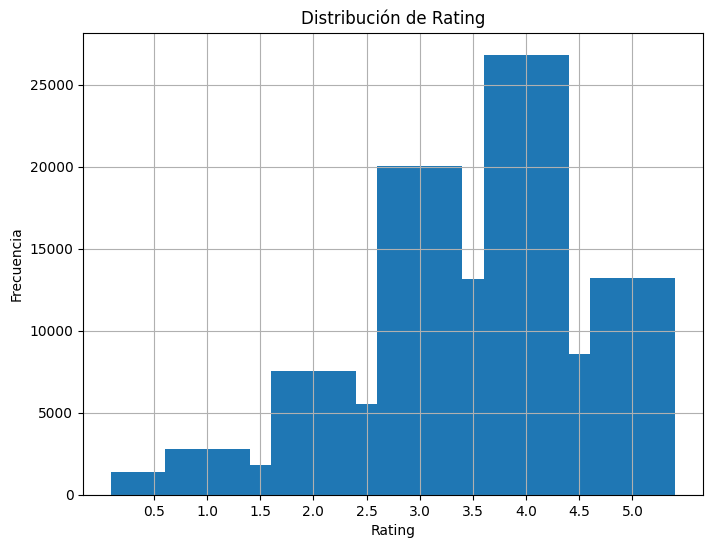

In [ ]:
#Grafico de la distribucion del objeto Rating
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
plt.bar(df_rating_dist['rating'], df_rating_dist['frequency'])
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Rating')
plt.xticks(df_rating_dist['rating'])  # Mostrar todos los valores de rating en el eje x
plt.grid(True)
plt.show()

### basados en Popularidad

In [ ]:
print("hola mundo")

hola mundo
